In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Si tenemos la siguiente ecuacion de calor, como aprovechamos odeint?
$$ \mu_{t} = \mu_{xx} $$
$$ \mu (x,0) = f(x) $$
$$ \mu (0,t) = g(t) $$
$$ \mu_{x}(N,t) = h(t) $$

In [5]:
# Funciones
def f(x):
  return np.exp(x)

def g(t):
  return 1/(1+t**2)

def w(t):
  return 1/(1+np.cos(t)**2)

In [6]:
# Definimos cantidad de puntos y el rango de x y t
N = 1000
Ti = 0
Tf = 5
Xi = 0
Xf = 2

# Definimos el espaciado
h = (Xf-Xi)/N

# Definimos el sistema
def sistema(u, t, A):
    return ((A @ u) + v(t))

# Armo la matriz A
Ndiag = -2
NdiagAbajo = 1
NdiagArriba = 1

Diag = np.ones(N-1)*Ndiag
DiagArriba = np.ones(N-2)*NdiagArriba
DiagAbajo = np.ones(N-2)*NdiagAbajo

A=np.diag(Diag)+np.diag(DiagArriba,1)+np.diag(DiagAbajo,-1)
A[-1][-1] = -1
A = A * (1/(h**2))

def v(t):
  z = np.zeros(N-1)
  z[0] = g(t)/h**2
  z[-1] = w(t)/h
  return (z)

x = np.linspace(Xi, Xf, N-1)
cond_incial = f(x)

t = np.linspace(0, 5, N)

u = odeint(sistema, cond_incial, t, (A,))

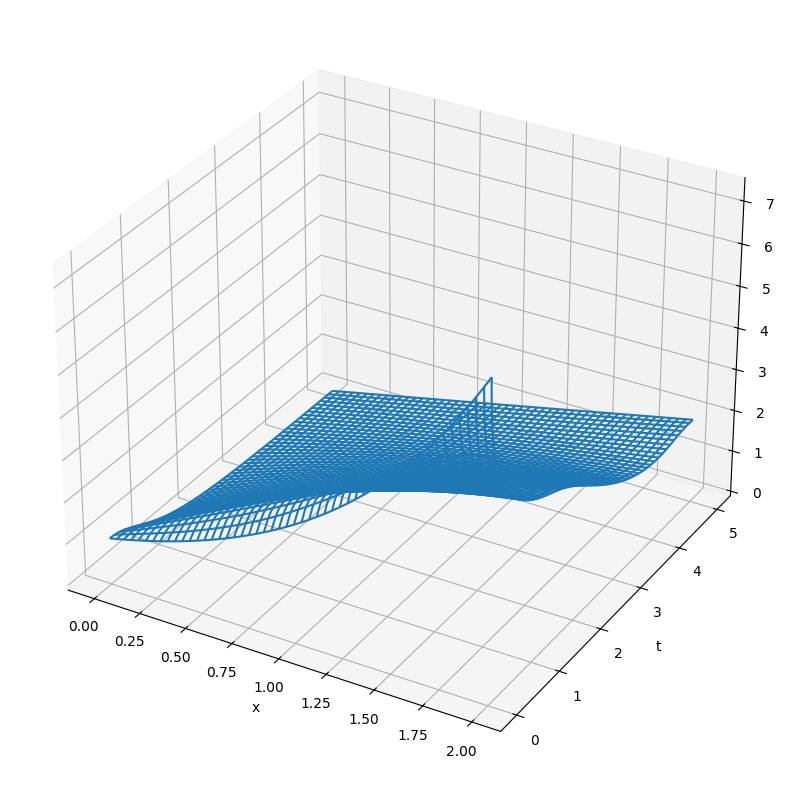

In [7]:
Xspan, Tspan = np.meshgrid(x, t)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, u)
plt.xlabel("x")
plt.ylabel("t")

plt.show()